## **Multilinear Regression - A Detailed Guide**

### **1. Introduction to Multilinear Regression**
Multilinear Regression (MLR) is a statistical technique used to model the relationship between one dependent variable and multiple independent variables. It is an extension of simple linear regression, where we have more than one predictor variable.

#### **Example:**
Suppose we want to predict the price of a house based on factors like:
- Square footage
- Number of bedrooms
- Distance from the city center
- Age of the house

Each of these factors influences the price, and we use multilinear regression to model their combined effect.

---
### **2. Equation of Multilinear Regression**
The general equation of multilinear regression is:

\[ Y = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n + \varepsilon \]

Where:
- \( Y \) = Dependent variable (Target variable)
- \( b_0 \) = Intercept (Constant term)
- \( b_1, b_2, ..., b_n \) = Coefficients of independent variables
- \( X_1, X_2, ..., X_n \) = Independent variables (Features)
- \( \varepsilon \) = Error term (Residual)

---
### **3. Assumptions of Multilinear Regression**
For multilinear regression to work effectively, certain assumptions must be met:
1. **Linearity:** The relationship between independent variables and the dependent variable is linear.
2. **Independence:** Observations should be independent of each other.
3. **Homoscedasticity:** Constant variance of errors across all levels of independent variables.
4. **No Multicollinearity:** Independent variables should not be highly correlated with each other.
5. **Normality of Residuals:** Residuals (errors) should be normally distributed.

---

---
### **5. Common Issues in Multilinear Regression**
- **Multicollinearity:** Use VIF (Variance Inflation Factor) to check and remove correlated features.
- **Outliers:** Use boxplots to detect and remove outliers.
- **Feature Scaling:** Standardization may improve performance.

---
### **6. Interview Questions and Answers**

#### **Q1: What is multilinear regression?**
**A:** Multilinear regression is an extension of simple linear regression where multiple independent variables are used to predict a dependent variable.

#### **Q2: What are the assumptions of multilinear regression?**
**A:** The key assumptions are Linearity, Independence, Homoscedasticity, No Multicollinearity, and Normality of Residuals.

#### **Q3: How do you detect multicollinearity?**
**A:** Multicollinearity can be detected using:
- Correlation Matrix
- Variance Inflation Factor (VIF), where VIF > 10 indicates high multicollinearity.

#### **Q4: How do you evaluate a multilinear regression model?**
**A:** The performance of a multilinear regression model can be evaluated using:
- **R-squared Score:** Explains the proportion of variance in the dependent variable.
- **Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values.

#### **Q5: What is the difference between R-squared and Adjusted R-squared?**
**A:**
- **R-squared:** Measures the proportion of variance explained by independent variables.
- **Adjusted R-squared:** Adjusts for the number of predictors in the model and is a better metric when multiple predictors are used.

#### **Q6: What is the impact of multicollinearity in regression?**
**A:** Multicollinearity affects the stability of regression coefficients, making it difficult to determine the effect of each independent variable.

---
### **7. Conclusion**
Multilinear regression is a powerful tool for predictive modeling when multiple factors influence a dependent variable. Understanding assumptions, detecting issues like multicollinearity, and evaluating model performance are crucial for effective implementation.

**End of Notes.** 🎯


#### **Step 1: Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



#### **Step 2: Load and Explore Data**


In [2]:
data = {
    "square_feet": [1400, 1600, 1700, 1875, 1100, 1550, 1230, 2100, 2500, 1850],
    "bedrooms": [3, 4, 3, 3, 2, 3, 2, 4, 4, 3],
    "distance_from_city": [5, 10, 15, 7, 12, 8, 20, 6, 3, 9],
    "age": [10, 15, 5, 20, 25, 8, 30, 7, 3, 12],
    "price": [250000, 320000, 330000, 400000, 220000, 315000, 200000, 450000, 550000, 390000]
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# df = pd.read_csv("house_prices.csv")
print(df.head())
print(df.info())
print(df.describe())

   square_feet  bedrooms  distance_from_city  age   price
0         1400         3                   5   10  250000
1         1600         4                  10   15  320000
2         1700         3                  15    5  330000
3         1875         3                   7   20  400000
4         1100         2                  12   25  220000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   square_feet         10 non-null     int64
 1   bedrooms            10 non-null     int64
 2   distance_from_city  10 non-null     int64
 3   age                 10 non-null     int64
 4   price               10 non-null     int64
dtypes: int64(5)
memory usage: 532.0 bytes
None
       square_feet   bedrooms  distance_from_city       age          price
count    10.000000  10.000000           10.000000  10.00000      10.000000
mean   1690.500000   3.1

#### **Step 3: Check for Multicollinearity**


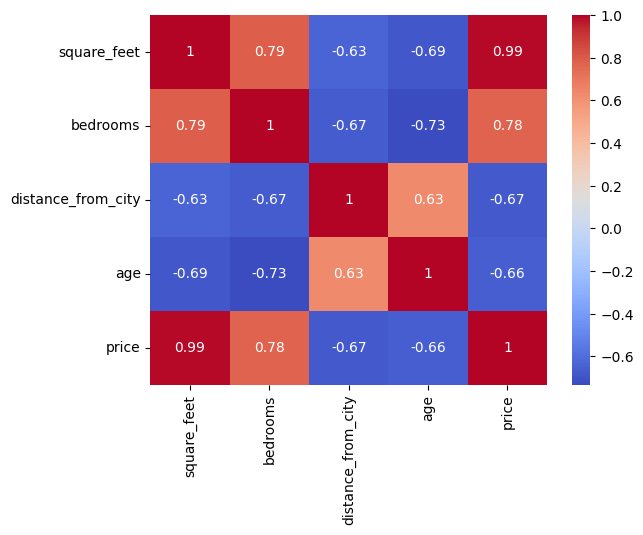

In [3]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### **Step 4: Define Features and Target Variable**


In [4]:
X = df[['square_feet', 'bedrooms', 'distance_from_city', 'age']]
y = df['price']

#### **Step 5: Split Data into Training and Testing Sets**


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#### **Step 6: Train the Model**


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### **Step 7: Evaluate the Model**


In [7]:
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1111659661.6337311
R-squared Score: 0.9159425586666365


In [8]:
# Define new house details as a DataFrame (to match model input format)
new_house = pd.DataFrame([[1800, 3, 8, 10]], columns=['square_feet', 'bedrooms', 'distance_from_city', 'age'])

# Predict the price
predicted_price = model.predict(new_house)

# Print the result
print("Predicted House Price:", predicted_price[0])


Predicted House Price: 381424.55602992


In [1]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#reading the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [5]:
y_pred = regressor.predict(X_test)

In [6]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,126992.93,117381.063730
1,144259.40,135758.704644
2,118474.03,116835.843382
3,89949.14,90121.249041
4,81005.76,84660.889967
5,134307.35,128062.771410
6,166187.94,172500.261478
7,149759.96,154733.736569
8,132602.65,151259.332714
9,14681.40,50459.829280


In [8]:
# RMSE
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

14430.747692019655
